In [1]:
import pandas as pd 
import json
import requests 
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np

In [2]:
#Create Initial DataFrame
d = pd.DataFrame({"id":[""]})

#How many number of pokemon do you want 
y = 151

#loop through PokeAPI first 151 pokemons
for x in range(1,y+1):
    
    #Get API url
    r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{x}/").json()
    
    #Pokemon ID
    i = r["id"]
    d.loc[x,"id"] = i
    
    #Pokemon Name
    n = r["name"]
    d.loc[x,"name"] = n
    
    #Pokemon Type
    t1 = r["types"][0]["type"]["name"]
    d.loc[x,"type 1"] = t1
    try:
        t2 = r["types"][1]["type"]["name"]
        d.loc[x,"type 2"] = t2
    except IndexError: 
        d.loc[x,"type 2"] = "na"
    
    #Pokemon Height
    h = r["height"]
    d.loc[x,"height"] = h
    
    #Pokemon Base Stat/HP
    b = r["stats"][0]["base_stat"]
    d.loc[x,"HP"] = b
    
    #Pokemon HP
    w = r["weight"]
    d.loc[x,"weight"] = w
    
d.drop(0, axis=0,inplace=True)
d.head(20)
#d = original DataFrame of 151 pokemon

KeyboardInterrupt: 

In [ ]:
#Group by type and calculate average HP per group into a new DataFrame
d1 = pd.DataFrame(d.groupby(["type 1"])["HP"].mean())
d2 = d1.reset_index()
d2["HP"] = round(d2["HP"],1)
d2
#d2 = HP per type DataFrame

,type 1,HP
0,bug,55.4
1,dragon,64.3
2,electric,54.4
3,fairy,82.5
4,fighting,63.6
5,fire,63.8
6,ghost,45.0
7,grass,65.0
8,ground,58.1
9,ice,77.5


<BarContainer object of 15 artists>

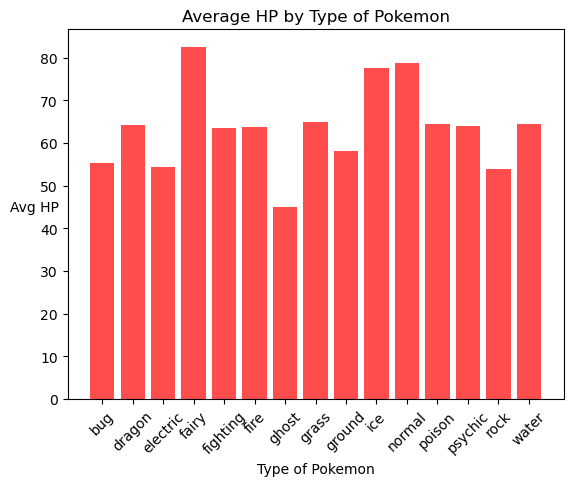

In [ ]:
#Plot Average HP for each Type of Pokemon 
x_axis = d2["type 1"]
y_axis = d2["HP"]
plt.xticks(rotation = 45)
plt.title("Average HP by Type of Pokemon")
plt.xlabel("Type of Pokemon")
plt.ylabel("Avg HP",rotation=0)
plt.bar(x_axis,y_axis, color = "r", alpha = .7)

In [ ]:
#Count number of pokemon from each type in orginal 151
f = pd.DataFrame(d["type 1"].value_counts())
#f = frequency count of each type
f2 = f.reset_index()
f2.columns = ["type 1", "count"]
f2
#f2 = type count DataFrame

,type 1,count
0,water,28
1,normal,22
2,poison,14
3,grass,12
4,fire,12
5,bug,12
6,electric,9
7,rock,9
8,ground,8
9,psychic,8


In [ ]:
#Merge hp per type and type count DataFrames
new = pd.merge(d2, f2, on = ["type 1"])
new["Frequency %"] = round(100*(new["count"]/d["type 1"].count()), 1)
new1 = new.sort_values("Frequency %", ascending = False)
new1
#new1 = type breakdown DataFrame

,type 1,HP,count,Frequency %
14,water,64.5,28,18.5
10,normal,78.7,22,14.6
11,poison,64.5,14,9.3
0,bug,55.4,12,7.9
5,fire,63.8,12,7.9
7,grass,65.0,12,7.9
2,electric,54.4,9,6.0
13,rock,53.9,9,6.0
8,ground,58.1,8,5.3
12,psychic,63.9,8,5.3


<BarContainer object of 15 artists>

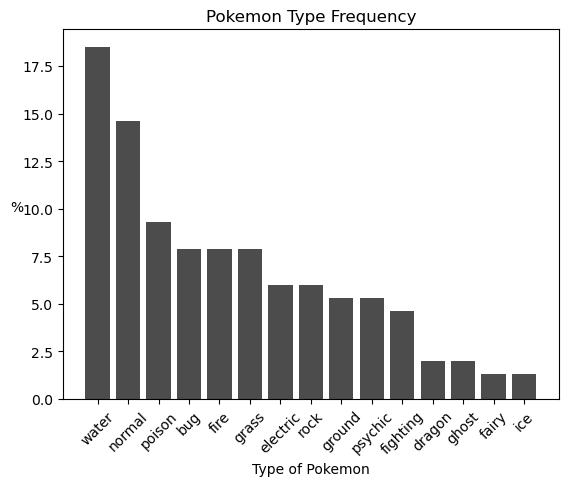

In [ ]:
#Plot type count frequencies
plt.xticks(rotation = 45)
plt.xlabel("Type of Pokemon")
plt.title("Pokemon Type Frequency")
plt.ylabel("%", rotation = 0)
plt.bar(new1["type 1"],new1["Frequency %"], color = "k", alpha = .7)